# **DATA** **ACQUISITION**

In [ ]:
import pandas as pd
df=pd.read_csv('Bengaluru_House_Data.csv')
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [ ]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [ ]:
df.shape

(13320, 9)

In [ ]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [ ]:
df['area_type'].unique() #Returns the unique area types

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [ ]:
df['area_type'].value_counts() #returns count of each area type

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [ ]:
#We do not need to consider area type, society, balcony and availability to build our model as they donot show much effect.so we drop all those attributes
df2=df.drop(['area_type', 'availability','society','balcony'],axis=1)
df2.shape


(13320, 5)

# **DATA CLEANING**

In [ ]:
#Check for any null values
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [ ]:
#Drop the null values rows and create a new dataframe of updtaed values
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [ ]:
df3.shape

(13246, 5)

# **FEATURE ENGINEERING**

In [ ]:
#Add new feature(integer) for identifying bhk (Bedrooms Hall Kitchen)
df3['bhk']=df3['size'].apply(lambda x:int(x.split(' ')[0]))
print(df3.bhk.unique())
df3['bhk'].dtype

[ 2  4  3  6  1  8  7  5 11  9 27 10 19 16 43 14 12 13 18]


<ipython-input-13-2867a4b7f0cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x:int(x.split(' ')[0]))


dtype('int64')

In [ ]:
#Explore total_sqft feature--infering if total sqft is a floating point integer return true else false
def is_float(x):
  try:
    float(x)
  except:
    return False 
  return True


In [ ]:
df3[~df3['total_sqft'].apply(is_float)].head(10) #you are setting the values to be the values of the apply function. Tilde means negation btw.

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [ ]:
'''Above shows that total_sqft can be a range (e.g. 2100-2850). 
For such case we can just take average of min and max value in the range. 
There are other cases such as 34.46Sq. Meter 
which one can convert to square ft using unit conversion.'''
#We will be dropping such corner cases to keep things simple
def convert_sqft_to_num(x):
  nums=x.split('-')
  if len(nums)==2:
    return (float(nums[0])+float(nums[1]))/2
  try:
    return float(x)
  except:
    return None

In [ ]:
df4=df3.copy()
df4.total_sqft=df4.total_sqft.apply(convert_sqft_to_num)
df4=df4[df4.total_sqft.notnull()]
df4.head(5)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [ ]:
#Check the data
df4.loc[25] #data at 25th row

location      Mangammanapalya
size                    3 BHK
total_sqft             1250.0
bath                      3.0
price                    56.0
bhk                         3
Name: 25, dtype: object

**ADD A NEW FEATURE**

In [ ]:
df5=df4.copy()
df5['Pricepersqft']=df5['price']*100000/df5['total_sqft'] #Find price per square feet
df5.head(5)

,location,size,total_sqft,bath,price,bhk,Pricepersqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [ ]:
df5_stats=df5['Pricepersqft'].describe()
df5_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: Pricepersqft, dtype: float64

In [ ]:
#Apply dimensionality reduction to reduce no of locations for the categorical variable locations
df5.location=df5.location.apply(lambda x:x.strip()) #Strip removes any leadig and trailing charecters
locationcount=df5['location'].value_counts(ascending=False)
locationcount

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [ ]:
locationcount.values.sum()

13200

In [ ]:
uniqueloc=len(locationcount)
uniqueloc

1287

In [ ]:
#locations with more  than 10 plots
len(locationcount[locationcount>10])

240

In [ ]:
len(locationcount[locationcount<=10])

1047

# **Dimensionality Reduction**

In [ ]:
'''Any location having less than 10 data points should be tagged as "other" location. 
This way number of categories can be reduced by huge amount.
 Later on when we do one hot encoding, it will help us with having fewer dummy columns'''

loc_lessthan10=locationcount[locationcount<=10]
loc_lessthan10

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [ ]:
uniqueloc=len(locationcount) #or len(df5.location.unique())
uniqueloc

1287

In [ ]:
df5.location=df5['location'].apply(lambda x: 'other' if x in loc_lessthan10 else x)
len(df5.location.unique())

241

In [ ]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,Pricepersqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [ ]:
#Generally when we enquire about the busineess logics, sqft per bedroom is 300.
'''2 bhk apartment is minimum 600 sqft. 
If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier.
We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft'''

df5[df5.total_sqft/df5.bhk<300].head()  # if total sqft=1000 and its a 4bhk flat its suspicious so we collect all such kind of rows info


,location,size,total_sqft,bath,price,bhk,Pricepersqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [ ]:
'''Check above data points. 
We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. 
These are clear data errors that can be removed safely'''

df5.shape

(13200, 7)

In [ ]:
#Create a new dataframe removing the outliers
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12456, 7)

**Outlier Removal Using Standard Deviation and Mean**

In [ ]:
df6.Pricepersqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: Pricepersqft, dtype: float64

In [ ]:
from pandas import Grouper
df6grp=df6.groupby('location')
df6grpdf=pd.DataFrame(df6grp)
print(df6grpdf.shape)
df6grpdf.head()

(241, 2)


,0,1
0,1st Block Jayanagar,location size total_s...
1,1st Phase JP Nagar,location size total_sq...
2,2nd Phase Judicial Layout,location size total...
3,2nd Stage Nagarbhavi,location size total_...
4,5th Block Hbr Layout,location size total_...


In [ ]:
'''Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000,
 this shows a wide variation in property prices. 
We should remove outliers per location using mean and one standard deviation'''
import numpy as np
from pandas import concat
def remove_pricepersqft_outliers(df):
  df_out=pd.DataFrame()
  for key,subdf in df.groupby('location'):
    mean1=np.mean(subdf.Pricepersqft)
    stdev=np.std(subdf.Pricepersqft)
    reduced_df=subdf[(subdf.Pricepersqft>(mean1-stdev)) & (subdf.Pricepersqft<(mean1+stdev))]
    df_out=pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out

df7=remove_pricepersqft_outliers(df6)
print(df7.shape)
df7.head(3)



(10242, 7)


,location,size,total_sqft,bath,price,bhk,Pricepersqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333


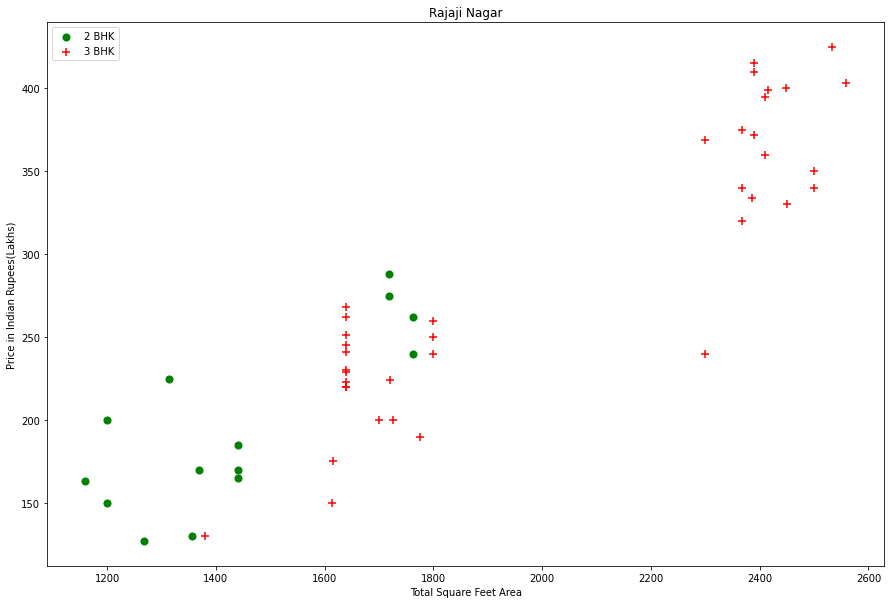

In [ ]:
'''Now lets check how the prices vary for 2bhk and 3bhk properties'''
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
def scatterPlotChart(df,location):
  bhk2=df[(df.location==location) & (df.bhk==2)]
  bhk3=df[(df.location==location) & (df.bhk==3)]
  matplotlib.rcParams['figure.figsize']=(15,10)
  plt.scatter(bhk2.total_sqft,bhk2.price,color='green',label='2 BHK',s=50)
  plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='red',label='3 BHK',s=50)
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price in Indian Rupees(Lakhs)")
  plt.title(location)
  plt.legend()

scatterPlotChart(df7,"Rajaji Nagar")


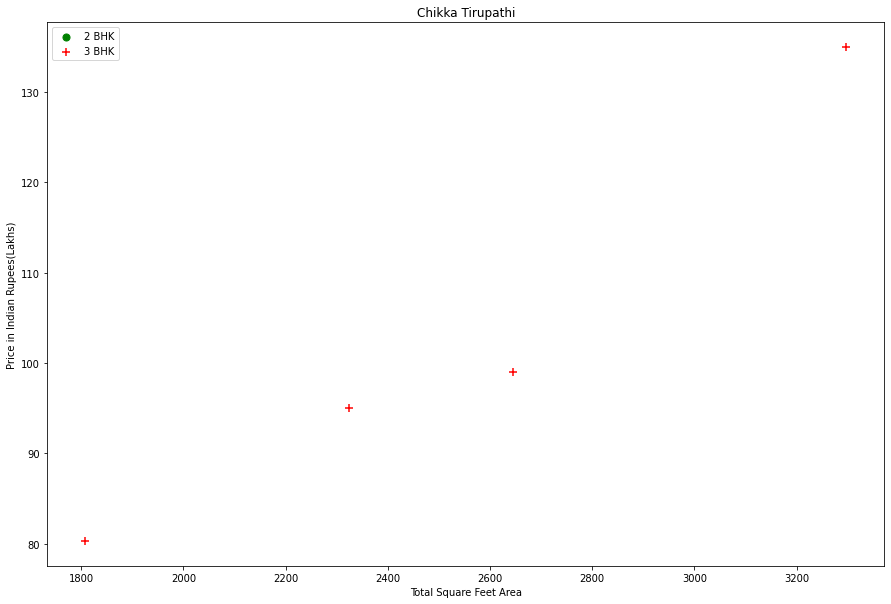

In [ ]:
scatterPlotChart(df7,"Chikka Tirupathi")

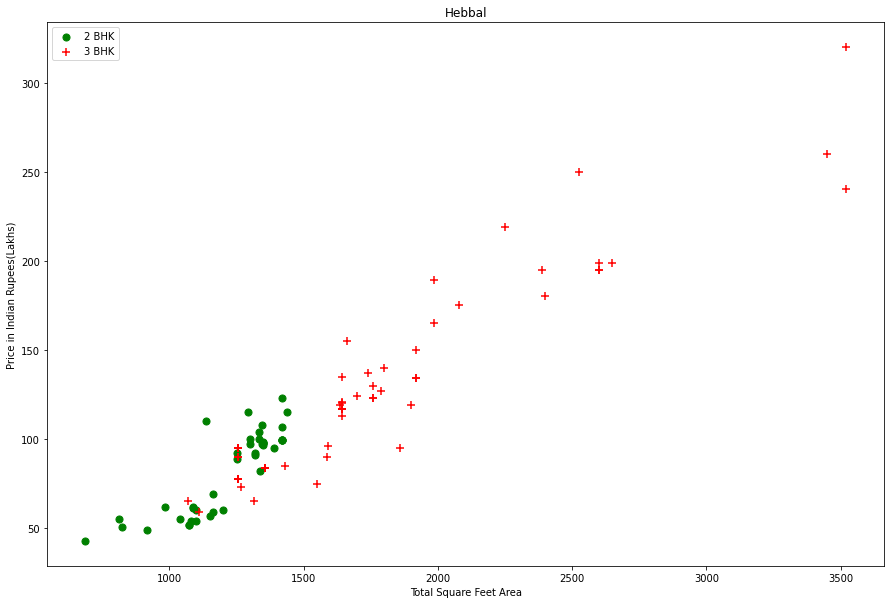

In [ ]:
scatterPlotChart(df7,"Hebbal")

In [ ]:
'''We should remove some properties where its cost with 3 bedroom apartment 
is less than that of 2 bedroom apartment(With same sqft area)
We can build a dict of stats per bhk
{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment
'''

(10242, 7)

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.Pricepersqft),
                'std': np.std(bhk_df.Pricepersqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Pricepersqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
    
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7317, 7)

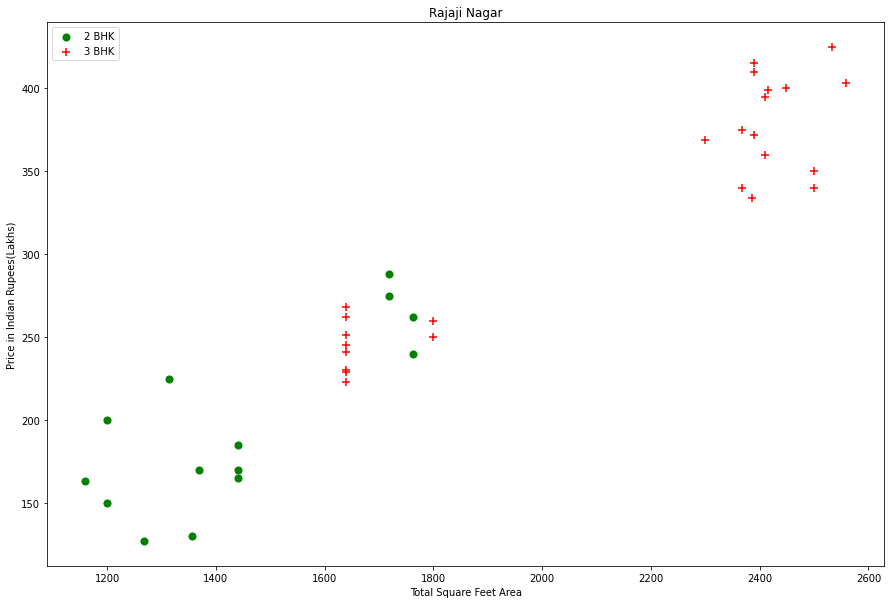

In [ ]:
#visualise the data using scatter plot chart
scatterPlotChart(df8,"Rajaji Nagar")

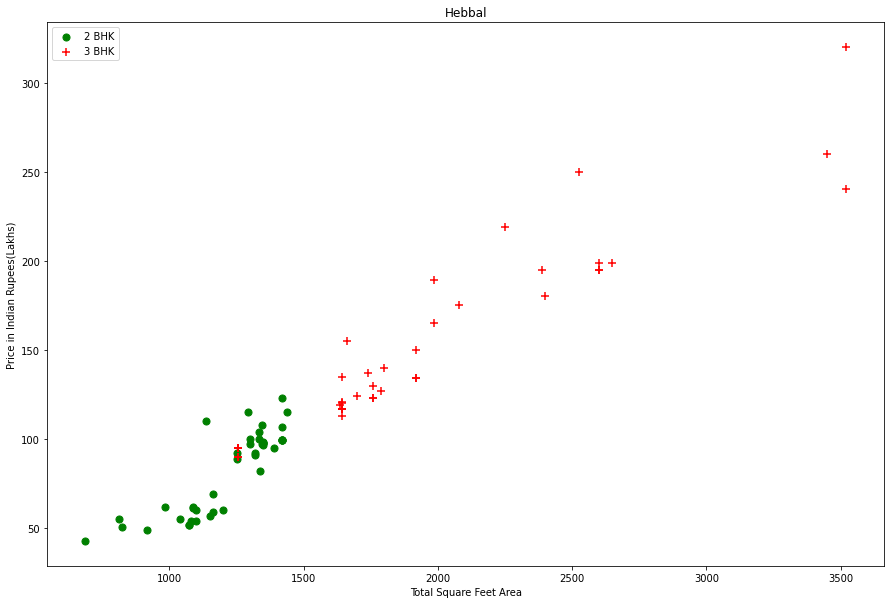

In [ ]:
scatterPlotChart(df8,"Hebbal")

Text(0, 0.5, 'Count')

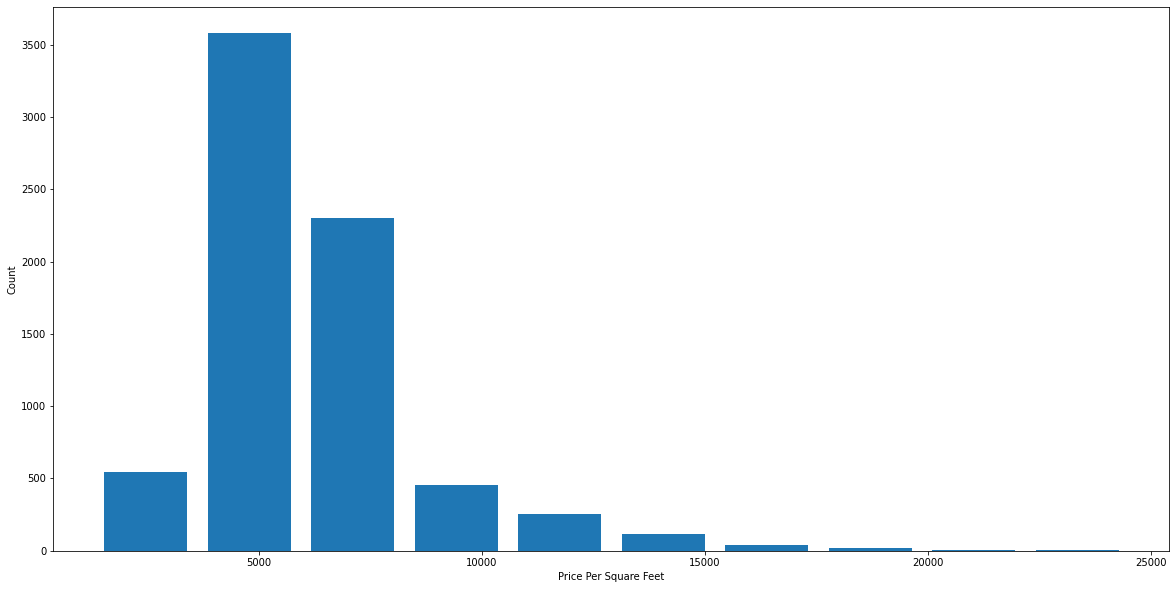

In [ ]:
#visualise the data using different kind of plots--rcParams used to manipulate Default configuration settings
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(df8.Pricepersqft,rwidth=0.8) #rwidth specifies bin width or bar width
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Outlier Removal Using Bathrooms Feature

Text(0, 0.5, 'count')

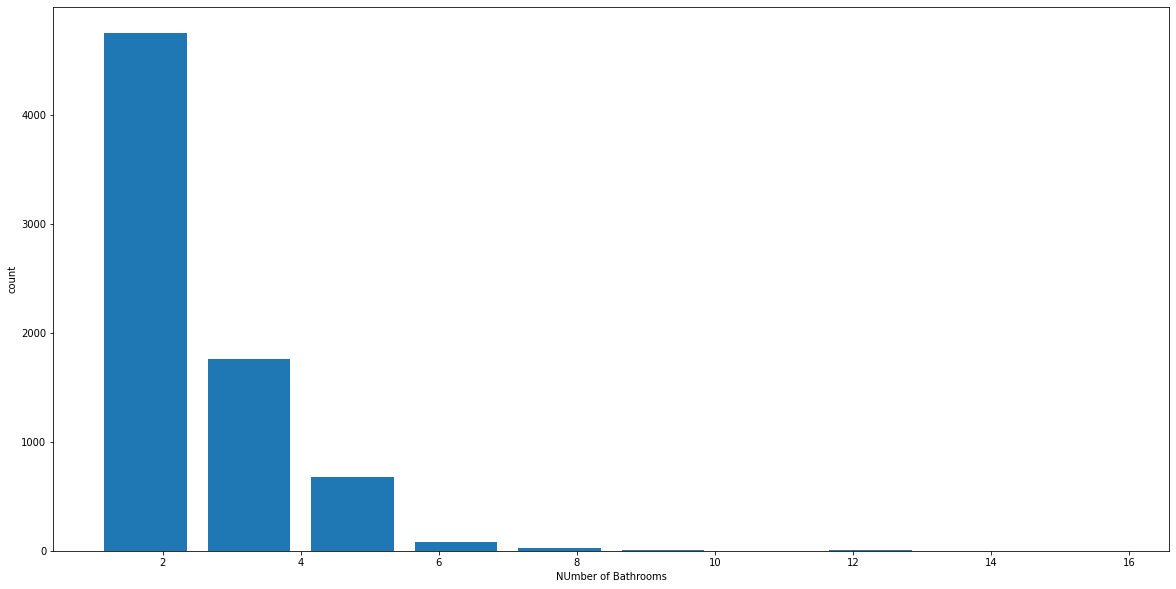

In [ ]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("NUmber of Bathrooms")
plt.ylabel("count")

In [ ]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,Pricepersqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [ ]:
#If there are 2 more bathrooms than no of bedrroms its unusual
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,Pricepersqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [ ]:
'''Again the business manager has a conversation with you (i.e. a data scientist)
 that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. 
Anything above that is an outlier or a data error and can be removed'''

df9=df8[df8.bath<df8.bhk+2]
df9.shape


(7239, 7)

In [ ]:
df9.head(5)

,location,size,total_sqft,bath,price,bhk,Pricepersqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [ ]:
df10=df9.drop(['size','Pricepersqft'],axis=1)
df10.head(5)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


**One Hot Encoding** -->
One-hot encoding is used in machine learning as a method to quantify categorical data. In short, this method produces a vector with length equal to the number of categories in the data set.One hot encoding is a process of converting categorical data variables so they can be provided to machine learning algorithms to improve predictions. One hot encoding is a crucial part of feature engineering for machine learning.With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns. Each integer value is represented as a binary vector.All the values are zero, and the index is marked with a 1.i.e,The position of that particular categorical data is marked as 1 and remaining as 0.The Python library Pandas provides a function called get_dummies to enable one-hot encoding.

In [ ]:
dummies=pd.get_dummies(df10.location)
dummies.head(5)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df11=pd.concat([df10,dummies.drop('other',axis='columns')],axis=1)
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df12=df11.drop('location',axis=1)
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X=df12.drop('price',axis=1)
X.head()


,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.shape

(7239, 243)

In [ ]:
y=df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [ ]:
len(y)

7239

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
regclf=LinearRegression()
regclf.fit(X_train,y_train)
regclf.score(X_test,y_test)

0.8629132245229443

Use K Fold cross validation to measure accuracy of our LinearRegression model

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

**Find best model using GridSearchCV**

***Lasso regression*** stands for Least Absolute Shrinkage and Selection Operator. It is a type of linear regression which is used for regularization and feature selection. Main idea behind Lasso Regression in Python or in general is shrinkage.Basic idea behind lasso regression is shrinkage and regularization. Shrinkage is defined as process where data values are shrunk towards central tendency for e.g. mean.

Lasso regression equation :

Sum of the squared residuals + λ *|the slope| where lambda is penalty val

Lasso regression helps in feature selection, by reducing the magnitude of lambda to zero if required.
1)when λ = 0, no parameters are eliminated in the equation
as2) λ increase, more coefficients are set to zero and eliminated. 
3)In theory, λ = infinity all coefficients are eliminated
we need also note that as λ increases, bias increases
4)As λ decreases, variance increases

Lasso model has to be used when data has multi collinearity

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

ValueError: ignored

**Test the model for few Properties**

> Indented block



In [ ]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [ ]:
#In Python, we can use the numpy.where() function to select elements from a numpy array, based on a condition.
'''[0][0] is indexing the output of np.where(). 
Since np.where() returns a tuple containing a NumPy array of indices, 
and we only want the first index, we use [0] to access the array, 
and then [0] again to access the first element of that array.
So all together, the code is finding the index of the column in X that has the name '2nd Phase Judicial Layout'''

np.where(X.columns=='2nd Phase Judicial Layout')[0][0]

5

**predict_price function-**-->So, this function takes in four parameters, and returns a predicted price for a property based on its location, square footage, number of bathrooms, and number of bedrooms. It uses the X DataFrame to look up the index of the location parameter, and then creates a numpy array x with the input features. The predicted price is then generated using the regclf regression model's predict() method with the input feature array x.

In [ ]:
def predict_price(location,sqft,bath,bhk):
  loc_index=np.where(X.columns==location)[0][0]
  x=np.zeros(len(X.columns))
  x[0]=sqft
  x[1]=bath
  x[2]=bath
  if loc_index>=0:
    x[loc_index]=1

  return regclf.predict([x])[0]


In [ ]:
predict_price('1st Phase JP Nagar',1000,2,2)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.86570258312098

In [ ]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.08062284986859

In [ ]:
predict_price('Indira Nagar',1000, 3, 3)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


195.52689759854638

***Export the tested model to a pickle file***

In [ ]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(regclf,f)

**Export location and column information to a file that will be useful later on in our prediction application**

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))